In [1]:
#import important libraries
import pandas as pd
import numpy as np

In [2]:
#load the dataset
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
#drop the stab column as it is one of the target variables but not needed in this classification problem
df=df.drop(columns='stab')

In [4]:
#chack for missing values
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stabf    0
dtype: int64

In [5]:
#define the target variables 
target = df['stabf'].value_counts()
target                             

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [6]:
#split  into predictive and target variables
x = df.drop(columns='stabf')
y = df['stabf']

In [7]:
#split the dataset into training and test sets 
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=1)
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [8]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_train_df =pd.DataFrame(scaler.fit_transform(x_train, y_train), columns = x_train.columns)
normalized_train_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521
2,-1.467850,1.298418,-0.502536,1.166046,-0.180521,0.490603,0.682560,-0.855302,1.399350,1.451534,-1.045743,0.492489
3,0.820081,0.529920,1.299657,-1.141975,-0.812854,-0.763632,1.521579,0.658780,-0.958319,1.361958,1.604140,0.275303
4,0.665424,-1.425627,0.312300,0.919137,-1.614296,0.760315,1.422019,0.639243,1.676895,0.695660,1.137504,-1.312575


In [9]:
normalized_test_df = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
normalized_test_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.593951,-0.412733,1.503924,1.116943,0.403423,-1.492971,-0.785033,1.566781,-0.901007,1.167203,-1.507330,1.084726
1,0.202190,0.374416,-0.188800,-0.522268,-0.225967,-1.058483,0.420047,1.028627,-1.625721,-0.395660,1.414651,1.226011
2,-1.079044,-0.313745,-0.884634,0.017080,-0.943122,0.112653,0.801335,0.733004,1.457108,-1.438495,0.651821,-1.682168
3,-0.083120,-1.107327,0.372805,-1.708152,0.753990,-1.637972,0.403805,-0.088036,0.083322,-1.672322,-0.357714,1.055865
4,0.873921,1.438466,0.086662,1.715037,-0.153880,-0.007015,-0.197053,0.472315,0.136549,-1.469731,0.956396,-0.819727


In [10]:
x_train.shape, normalized_train_df.shape, x_test.shape, normalized_test_df.shape

((8000, 12), (8000, 12), (2000, 12), (2000, 12))

## Using Random Forest Classifier 

In [11]:
#using random forest to train the model 
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(random_state=1)
random.fit(normalized_train_df, y_train)

RandomForestClassifier(random_state=1)

In [12]:
#predicting the model 
random_pred = random.predict(normalized_test_df)

In [13]:
#measuring the performace of the model 
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score, confusion_matrix, f1_score
cnf_mat=confusion_matrix(y_test, random_pred, labels=['stable', 'unstable'])
cnf_mat = pd.DataFrame(cnf_mat, columns = ["True-Positive", "True-Negative"],
                                 index = ["Predicted-Positive", "Predicted-Negative"])
cnf_mat

,True-Positive,True-Negative
Predicted-Positive,625,87
Predicted-Negative,55,1233


In [14]:
print(classification_report(y_test, random_pred))

              precision    recall  f1-score   support

      stable       0.92      0.88      0.90       712
    unstable       0.93      0.96      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [15]:
print('Accuracy score is:    {}'.format(accuracy_score(y_test, random_pred)))
print('Precision score is:   {}'.format(precision_score(y_test, random_pred, pos_label='stable')))
print('Recall score is:      {}'.format(recall_score(y_test, random_pred, pos_label='stable')))
print('F1 score is:          {}'.format(f1_score(y_test, random_pred, pos_label='stable')))

Accuracy score is:    0.929
Precision score is:   0.9191176470588235
Recall score is:      0.8778089887640449
F1 score is:          0.8979885057471264


## Using Extra Trees Classifier

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
tree = ExtraTreesClassifier(random_state=1)
tree = tree.fit(normalized_train_df, y_train)

In [17]:
tree_pred = tree.predict(normalized_test_df)

### Performance metrics for Extra tree claasifier

In [18]:
#measuring the performace of the model 
cnf_mat=confusion_matrix(y_test, tree_pred, labels=['stable', 'unstable'])
cnf_mat = pd.DataFrame(cnf_mat, columns = ["True-Positive", "True-Negative"],
                                 index = ["Predicted-Positive", "Predicted-Negative"])
cnf_mat

,True-Positive,True-Negative
Predicted-Positive,606,106
Predicted-Negative,38,1250


In [19]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

      stable       0.94      0.85      0.89       712
    unstable       0.92      0.97      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [20]:
print('Accuracy score is:    {}'.format(accuracy_score(y_test, tree_pred)))
print('Precision score is:   {}'.format(precision_score(y_test, tree_pred, pos_label='stable')))
print('Recall score is:      {}'.format(recall_score(y_test, tree_pred, pos_label='stable')))
print('F1 score is:          {}'.format(f1_score(y_test, tree_pred, pos_label='stable')))

Accuracy score is:    0.928
Precision score is:   0.9409937888198758
Recall score is:      0.851123595505618
F1 score is:          0.8938053097345133


## Improve the ExtraTreesClassifier

In [21]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [22]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(tree, hyperparameter_grid, random_state=1)
random_cv = random_cv.fit(normalized_train_df, y_train)

In [23]:
#check for the best parameters to use to improve the extra tree classifier
random_cv.best_params_

{'max_features': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [24]:
improved_tree = ExtraTreesClassifier(n_estimators=1000, min_samples_leaf=8,
                                     min_samples_split=2,max_features= None,
                                     random_state=1)
improved_tree = improved_tree.fit(normalized_train_df, y_train)
improved_tree_pred = improved_tree.predict(normalized_test_df)

### Performance metrics for improved extra tree classifier

In [25]:
#print the confusion matrix
cnf_mat=confusion_matrix(y_test, improved_tree_pred, labels=['stable', 'unstable'])
cnf_mat = pd.DataFrame(cnf_mat, columns = ["True-Positive", "True-Negative"],
                                 index = ["Predicted-Positive", "Predicted-Negative"])
cnf_mat

,True-Positive,True-Negative
Predicted-Positive,619,93
Predicted-Negative,53,1235


In [26]:
#print the classification report
print(classification_report(y_test, improved_tree_pred))

              precision    recall  f1-score   support

      stable       0.92      0.87      0.89       712
    unstable       0.93      0.96      0.94      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [27]:
print('Accuracy score is:    {}'.format(accuracy_score(y_test, improved_tree_pred)))
print('Precision score is:   {}'.format(precision_score(y_test, improved_tree_pred, pos_label='stable')))
print('Recall score is:      {}'.format(recall_score(y_test, improved_tree_pred, pos_label='stable')))
print('F1 score is:          {}'.format(f1_score(y_test, improved_tree_pred, pos_label='stable')))

Accuracy score is:    0.927
Precision score is:   0.9211309523809523
Recall score is:      0.8693820224719101
F1 score is:          0.8945086705202311


## Feature Importance

In [28]:
feature_imp = improved_tree.feature_importances_
feature_imp

array([0.13723975, 0.1405075 , 0.13468029, 0.13541676, 0.00368342,
       0.00533686, 0.00542927, 0.00496249, 0.10256244, 0.10757765,
       0.11306268, 0.10954089])

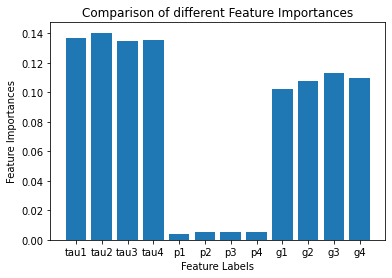

In [29]:
#visualizing and comparing
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(normalized_train_df.columns, feature_imp) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 

## Extreme Boosting Model with XGBoost

In [30]:
from xgboost import XGBClassifier
extreme = XGBClassifier(random_state= 1 )
extreme.fit(normalized_train_df, y_train)
extreme_pred = extreme.predict(normalized_test_df)

### Performance metrics for extreme boosting model

In [31]:
cnf_mat=confusion_matrix(y_test, extreme_pred, labels=['stable', 'unstable'])
cnf_mat = pd.DataFrame(cnf_mat, columns = ["True-Positive", "True-Negative"],
                                 index = ["Predicted-Positive", "Predicted-Negative"])
cnf_mat

,True-Positive,True-Negative
Predicted-Positive,648,64
Predicted-Negative,45,1243


In [32]:
#print the classification report
print(classification_report(y_test,extreme_pred))

              precision    recall  f1-score   support

      stable       0.94      0.91      0.92       712
    unstable       0.95      0.97      0.96      1288

    accuracy                           0.95      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000



In [33]:
print('Accuracy score is:    {}'.format(accuracy_score(y_test, extreme_pred)))
print('Precision score is:   {}'.format(precision_score(y_test, extreme_pred, pos_label='stable')))
print('Recall score is:      {}'.format(recall_score(y_test, extreme_pred, pos_label='stable')))
print('F1 score is:          {}'.format(f1_score(y_test, extreme_pred, pos_label='stable')))

Accuracy score is:    0.9455
Precision score is:   0.935064935064935
Recall score is:      0.9101123595505618
F1 score is:          0.9224199288256227


## Light Gradient Boosting Model

In [34]:
from lightgbm import LGBMClassifier
light = LGBMClassifier(random_state=1)
light.fit(normalized_train_df, y_train)
light_pred = light.predict(normalized_test_df)

In [35]:
cnf_mat = confusion_matrix(y_test, light_pred, labels=['stable', 'unstable'])
cnf_mat = pd.DataFrame(cnf_mat, columns = ["True-Positive", "True-Negative"],
                                 index = ["Predicted-Positive", "Predicted-Negative"])
cnf_mat

,True-Positive,True-Negative
Predicted-Positive,635,77
Predicted-Negative,48,1240


In [36]:
#print the classification report
print(classification_report(y_test, light_pred))

              precision    recall  f1-score   support

      stable       0.93      0.89      0.91       712
    unstable       0.94      0.96      0.95      1288

    accuracy                           0.94      2000
   macro avg       0.94      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000



In [37]:
print('Accuracy score is:    {}'.format(accuracy_score(y_test, light_pred)))
print('Precision score is:   {}'.format(precision_score(y_test, light_pred, pos_label='stable')))
print('Recall score is:      {}'.format(recall_score(y_test, light_pred, pos_label='stable')))
print('F1 score is:          {}'.format(f1_score(y_test, light_pred, pos_label='stable')))

Accuracy score is:    0.9375
Precision score is:   0.9297218155197657
Recall score is:      0.8918539325842697
F1 score is:          0.910394265232975


## Logistic Regression Model

In [38]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=1)
logreg.fit(normalized_train_df, y_train)
log_reg_pred=logreg.predict(normalized_test_df)

In [39]:
#CONFUSION MATRIX
cnf_mat = confusion_matrix(y_test, log_reg_pred, labels=['stable', 'unstable'])
cnf_mat = pd.DataFrame(cnf_mat, columns = ["True-Positive", "True-Negative"],
                                 index = ["Predicted-Positive", "Predicted-Negative"])
cnf_mat

,True-Positive,True-Negative
Predicted-Positive,494,218
Predicted-Negative,174,1114


In [40]:
#print the classification report
print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

      stable       0.74      0.69      0.72       712
    unstable       0.84      0.86      0.85      1288

    accuracy                           0.80      2000
   macro avg       0.79      0.78      0.78      2000
weighted avg       0.80      0.80      0.80      2000



In [41]:
#performance metrics
print('Accuracy score is:    {}'.format(accuracy_score(y_test, log_reg_pred)))
print('Precision score is:   {}'.format(precision_score(y_test, log_reg_pred, pos_label='stable')))
print('Recall score is:      {}'.format(recall_score(y_test, log_reg_pred, pos_label='stable')))
print('F1 score is:          {}'.format(f1_score(y_test, log_reg_pred, pos_label='stable')))

Accuracy score is:    0.804
Precision score is:   0.7395209580838323
Recall score is:      0.6938202247191011
F1 score is:          0.7159420289855073
